In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading data
data= pd.read_csv('/content/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
# Collecting X and Y
X= data['Head Size(cm^3)'].values
Y= data['Brain Weight(grams)'].values

In [4]:
# Mean X and Y
mean_x= np.mean(X)
mean_y= np.mean(Y)

# Total number of values
m= len(X)

# Using the formula to calculate b1 and b0
number= 0
denum= 0
for i in range(m):
  number += (X[i] - mean_x) * (Y[i] - mean_y)
  denum += (X[i] - mean_x) ** 2
b1 = number/denum
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1, b0)

0.26342933948939945 325.57342104944223


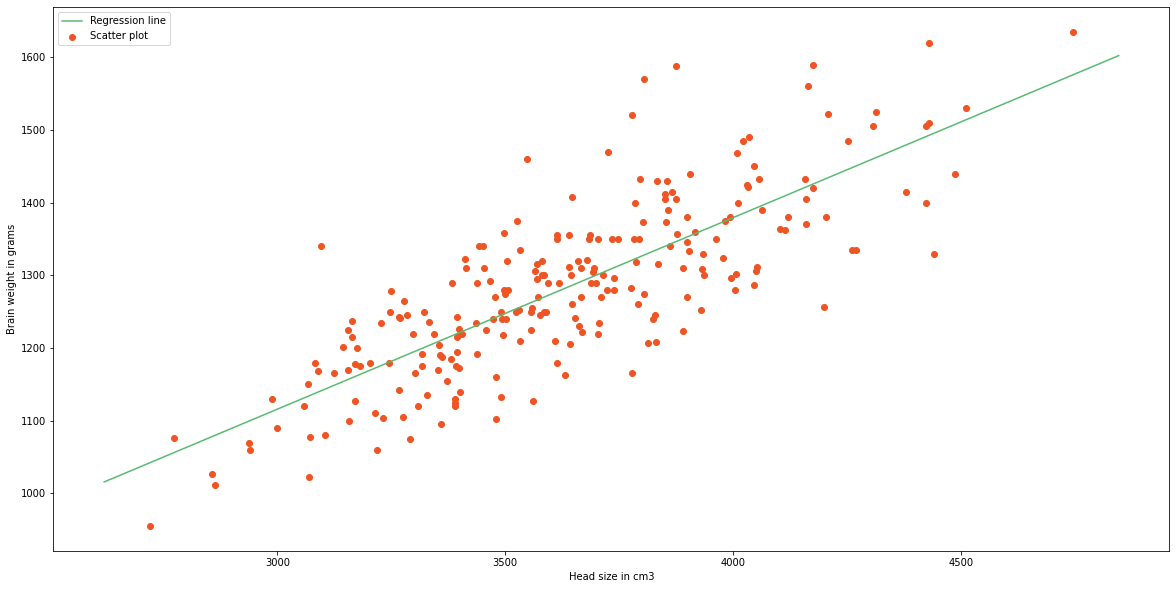

In [9]:
# plotting values and regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values of X and Y
x= np.linspace(min_x, max_x, 1000)
y= b0 +b1 * x

# Plotting line
plt.plot(x, y, color= '#58b970', label= 'Regression line')

# Plotting scatter points
plt.scatter(X, Y, c='#ef5423', label='Scatter plot')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

In [10]:
ss_t= 0
ss_r= 0
for i in range(m):
  y_pred= b0 + b1 * X[i]
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2

r2 = 1 - (ss_r/ss_t)
print(r2) 

0.6393117199570003


In [12]:
# Using sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cant use rank 1 matrix in scikit learn
X= X.reshape((m, 1))

# Creating model
reg= LinearRegression()

# Fitting training data
reg= reg.fit(X, Y)

# Y prediction
Y_pred= reg.predict(X)

# Calculating r2 score
r2_score= reg.score(X, Y)
print(r2_score)

0.639311719957
